## DECISION TREE - CANCER DATASET

In [1]:
pwd

'C:\\Users\\test63\\lab5'

### load the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report

In [5]:
df=pd.read_csv("cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 
STEP 2: SPLIT THE FEATURES AND LABEL

In [25]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

## STEP 3: TRAINING AND TEST SPLIT

In [27]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## STEP 4: DEFINE THE CLASSIFICATION MODEL

In [29]:
model=DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## STEP 5: PERFORMANCE EVALUATION

In [31]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## STEP 6: CLASSIFY THE NEW SAMPLE DATA

In [43]:
input_features = [((17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,
                  1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,
                  0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189))]
print(len(input_features)) 


1


## STEP 7: VISULIZATION

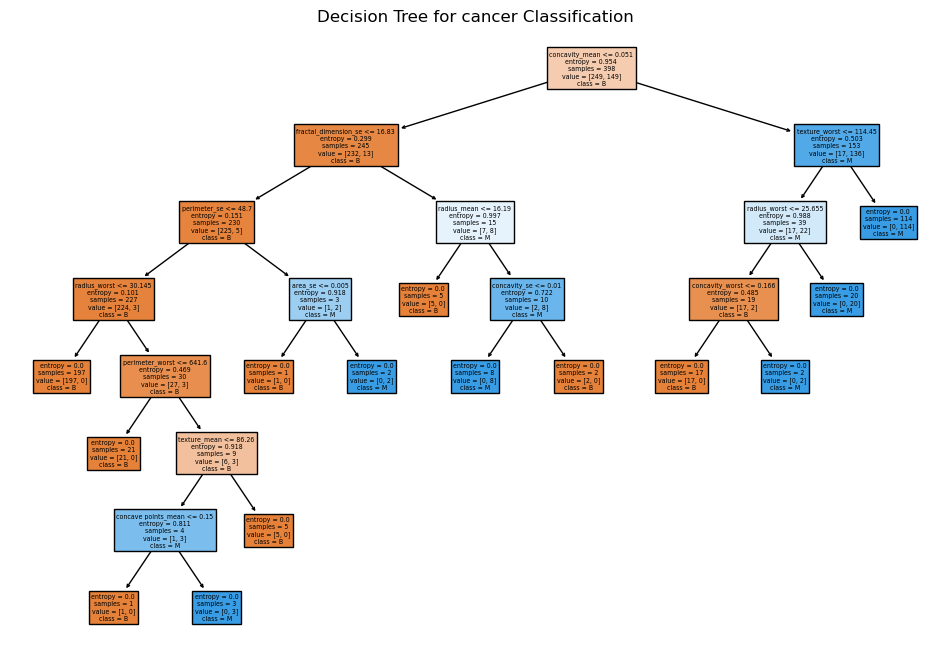

In [45]:
feature_names = df.columns.drop('diagnosis')
class_names = [str(cls) for cls in model.classes_]

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names)
plt.title("Decision Tree for cancer Classification")
plt.show()


### NAIVE BAYES


## STEP 1: LOAD THE DATASET

In [79]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [81]:
df=pd.read_csv("fruits.csv")
df.head()

,weight,size,color_score,Fruit_label
0,150,7.5,0.50,lemon
1,170,7.5,0.50,lemon
2,190,8.0,0.74,orange
3,210,8.5,0.75,orange
4,230,8.5,0.75,orange


## STEP 2: SPLIT THE FEATURES AND LABEL

In [83]:
x=df[['weight','size','color_score']]
y=df['Fruit_label']

## STEP 3: TRAINING AND TEST SPLIT AND DEFINE THE CLASSIFICATION MODEL

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

## STEP 4: PERFORMANCE EVALUATION

In [100]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

 Pomegranate       1.00      1.00      1.00         2
       lemon       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



## STEP 5: CLASSIFY THE NEW SAMPLE DATA

In [102]:
y_pred=model.predict([[150,7.5,0.50]])
print(y_pred)

['lemon']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(



## STEP 7: VISULIZATION


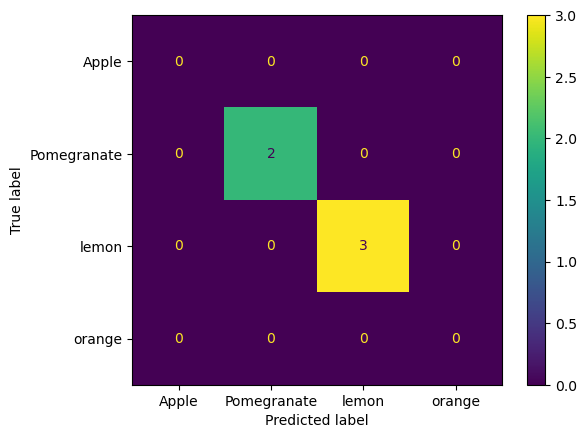

In [105]:
# Make sure y_pred matches y_test length
y_pred = model.predict(x_test)  # X_test must match y_test in length

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


# 
NAVIE BAYE-  NB users dataset

### STEP 1: LOAD THE DATASET

In [131]:
df=pd.read_csv("NBUser data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## STEP 3: TRAINING AND TEST SPLIT

In [133]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [145]:
x=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']


## STEP 3: TRAINING AND TEST SPLIT AND DEFINE THE CLASSIFICATION MODEL

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

## STEP 4: PERFORMANCE EVALUATION

In [149]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



## STEP 5: CLASSIFY THE NEW SAMPLE DATA

In [151]:
y_pred=model.predict([[1,19,19000]])
print(y_pred)

[0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## STEP 6: VISULIZATION

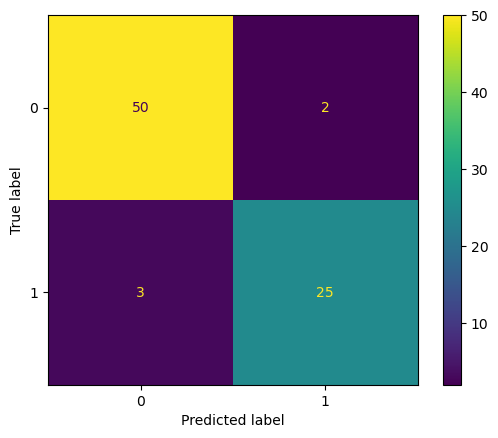

In [153]:

y_pred = model.predict(x_test)  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()